In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
sns.set()

In [60]:
df_dados = pd.read_csv('dataframe-bsi-2009-2022.csv', sep=';')

# Filtros

Filtrando os dados da unidade 1.

In [61]:
filtro  = df_dados['unidade'] == 1
df_dados_filtrado = df_dados[filtro]
df_dados_filtrado

,discente,unidade,media_final,descricao,ano,id_componente,nome,ch_total,sexo,ano_nascimento,ano_ingresso,status
0,afba64c0118bfcc8d5b3987e725ed545,1.0,"1,5",REPROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,90,M,1987,2009,CANCELADO
3,9526e01da587b20211a39b4e66673aea,1.0,"9,2",APROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,90,M,1990,2009,CONCLUÍDO
6,1ed6777bd6ff4fd393e0b334d519c642,1.0,"8,0",APROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,90,M,1991,2009,CONCLUÍDO
9,cd66757ed4a317a3537ae3e246648778,1.0,"7,3",APROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,90,M,1975,2009,CANCELADO
12,fa7b20f8ac2312976cd7338487ad527d,1.0,"9,8",APROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,90,M,1978,2009,CONCLUÍDO
...,...,...,...,...,...,...,...,...,...,...,...,...
53189,7d2dd0d35ebb8319b0c0e612660d2c3a,1.0,"9,3",APROVADO,20222,62766,SISTEMAS DE APOIO À DECISÃO,60,M,2000,2019,CONCLUÍDO
53190,7d2dd0d35ebb8319b0c0e612660d2c3a,1.0,"9,8",APROVADO,20222,62764,PROGRAMAÇÃO VISUAL,60,M,2000,2019,CONCLUÍDO
53193,22f4aed4a073c5e9515a8669e9c102f3,1.0,"5,2",APROVADO POR NOTA,20222,62764,PROGRAMAÇÃO VISUAL,60,M,1984,2019,ATIVO - FORMANDO
53196,e10089f6080d3afa8904437086ea2752,1.0,"9,3",APROVADO,20222,2050107,DIREITO E LEGISLAÇÃO SOCIAL,60,M,2002,2019,ATIVO


In [62]:
# Contar o número de reprovações (notas abaixo de 6.0)
reprovacoes_por_aluno = df_dados_filtrado[df_dados_filtrado['status'] == 'CANCELADO'].groupby('discente').size()
num_reprovacoes = len(reprovacoes_por_aluno)
num_reprovacoes

410

Fazendo um recorte da nossa análise, vamos começar por disciplinas obrigatórias do Bacharelado em Sistemas da Informação (BSI):

In [63]:
lista_obrigatórias = [
                'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO',
                'INTRODUÇÃO À INFORMÁTICA',
                'FUNDAMENTOS DE MATEMÁTICA',
                'LÓGICA',
                'TEORIA GERAL DA ADMINISTRAÇÃO',
                'PROGRAMAÇÃO',
                'CÁLCULO DIFERENCIAL E INTEGRAL',
                'TEORIA GERAL DOS SISTEMAS',
                'PROGRAMAÇÃO ORIENTADA A OBJETOS I',
                'ESTRUTURA DE DADOS',
                'ÁLGEBRA LINEAR',
                'ORGANIZAÇÃO, SISTEMAS E MÉTODOS',
                'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO',
                'PROGRAMAÇÃO WEB',
                'ARQUITETURA DE COMPUTADORES',
                'PROBABILIDADE E ESTATÍSTICA',
                'BANCO DE DADOS',
                'ENGENHARIA DE SOFTWARE I',
                'PROGRAMAÇÃO ORIENTADA A OBJETOS II',
                'SISTEMAS OPERACIONAIS',
                'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS',
                'ENGENHARIA DE SOFTWARE II',
                'REDES DE COMPUTADORES',
                'CONTABILIDADE E CUSTOS',
                'EMPREENDEDORISMO EM INFORMÁTICA',
                'GESTÃO DE PROJETO DE SOFTWARE',
                'PROGRAMAÇÃO VISUAL',
                'MATEMÁTICA FINANCEIRA',
                'SISTEMAS DE APOIO À DECISÃO',
                'ÉTICA',
                ]
condição_nome = f"nome in {lista_obrigatórias}"
df_dados_filtrado = df_dados_filtrado.query(condição_nome)

Contagem da descrição dos resultados obtidos nas disciplinas

In [64]:
df_dados_filtrado.descricao.value_counts()

descricao
APROVADO                            6392
APROVADO POR NOTA                   2245
REPROVADO                           1695
REPROVADO POR MÉDIA E POR FALTAS    1018
CANCELADO                            573
TRANCADO                             381
EXCLUIDA                             187
REPROVADO POR FALTAS                  41
REPROVADO POR NOTA                    24
DESISTENCIA                           17
REPROVADO POR NOTA E FALTA             9
Name: count, dtype: int64

Vamos descartar o caso de indeferimento, já que neste caso o aluno não chegou a cursar a disciplina:

In [65]:
lista_não_cursou = [
                    "TRANCADO",
                    "CANCELADO",
                    "EXCLUIDA",
                    "DESISTENCIA",
                    ]
condição_tentativa = f"not descricao in {lista_não_cursou}"
df_dados_filtrado = df_dados_filtrado.query(condição_tentativa)

In [66]:
df_dados_filtrado.descricao.value_counts()

descricao
APROVADO                            6392
APROVADO POR NOTA                   2245
REPROVADO                           1695
REPROVADO POR MÉDIA E POR FALTAS    1018
REPROVADO POR FALTAS                  41
REPROVADO POR NOTA                    24
REPROVADO POR NOTA E FALTA             9
Name: count, dtype: int64

In [67]:
df_dados_filtrado=df_dados_filtrado.replace({'descricao':
               {'APROVADO POR NOTA':'APROVADO',
                'REPROVADO POR FALTAS':'REPROVADO',
                'REPROVADO POR MÉDIA E POR FALTAS':'REPROVADO',
                'REPROVADO POR NOTA E FALTA':'REPROVADO',
                'REPROVADO POR NOTA':'REPROVADO',

                }}, regex=True)

In [68]:
#Agrupa e conta nome e descricao
situacao_disciplinas = df_dados_filtrado.groupby(['nome','descricao'],as_index=False).count()

In [69]:
#selecionas colunas
situacao_disciplinas = situacao_disciplinas.filter(['nome','descricao', 'ano'])

In [70]:
situacao_disciplinas = situacao_disciplinas.rename(columns={'ano': 'total'})

In [71]:
filtro_situacao  = situacao_disciplinas['descricao'] == 'REPROVADO'
situacao_reprovado = situacao_disciplinas[filtro_situacao]

In [72]:
situacao_reprovado.sort_values(by='total', ascending=False).head(50)

,nome,descricao,total
25,INTRODUÇÃO À INFORMÁTICA,REPROVADO,320
19,FUNDAMENTOS DE MATEMÁTICA,REPROVADO,295
27,LÓGICA,REPROVADO,283
1,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,REPROVADO,230
17,ESTRUTURA DE DADOS,REPROVADO,227
3,ARQUITETURA DE COMPUTADORES,REPROVADO,208
37,PROGRAMAÇÃO ORIENTADA A OBJETOS I,REPROVADO,174
35,PROGRAMAÇÃO,REPROVADO,167
57,ÁLGEBRA LINEAR,REPROVADO,109
9,CÁLCULO DIFERENCIAL E INTEGRAL,REPROVADO,109


Vamos considerar apenas as possibilidades que tiveram um número razoável de casos:

In [73]:
reprovações = ["REPROVADO POR NOTA","REPROVADO POR NOTA E FALTA","REPROVADO POR FALTAS"]
condição = f"not descricao in {reprovações}"
df_dados_filtrado = df_dados_filtrado.query(condição)

In [74]:
df_dados_filtrado.descricao.value_counts()

descricao
APROVADO     8637
REPROVADO    2787
Name: count, dtype: int64

Vamos agora discriminar o resultado por disciplina:

In [75]:
agregado_obrigatórias = df_dados_filtrado.groupby(["nome","descricao"]).size()
agregado_obrigatórias

nome                                       descricao
ALGORITMOS E LÓGICA DE PROGRAMAÇÃO         APROVADO     471
                                           REPROVADO    230
ARQUITETURA DE COMPUTADORES                APROVADO     243
                                           REPROVADO    208
BANCO DE DADOS                             APROVADO     267
                                           REPROVADO     63
CONTABILIDADE E CUSTOS                     APROVADO     247
                                           REPROVADO     16
CÁLCULO DIFERENCIAL E INTEGRAL             APROVADO     259
                                           REPROVADO    109
EMPREENDEDORISMO EM INFORMÁTICA            APROVADO     232
                                           REPROVADO      9
ENGENHARIA DE SOFTWARE I                   APROVADO     270
                                           REPROVADO     23
ENGENHARIA DE SOFTWARE II                  APROVADO     219
                                           REPR

In [76]:
percentual_obrigatórias = pd.crosstab(df_dados_filtrado["nome"], df_dados_filtrado["descricao"], normalize="index")
percentual_obrigatórias

descricao,APROVADO,REPROVADO
nome,,
ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,0.671897,0.328103
ARQUITETURA DE COMPUTADORES,0.538803,0.461197
BANCO DE DADOS,0.809091,0.190909
CONTABILIDADE E CUSTOS,0.939163,0.060837
CÁLCULO DIFERENCIAL E INTEGRAL,0.703804,0.296196
EMPREENDEDORISMO EM INFORMÁTICA,0.962656,0.037344
ENGENHARIA DE SOFTWARE I,0.921502,0.078498
ENGENHARIA DE SOFTWARE II,0.948052,0.051948
ESTRUTURA DE DADOS,0.524109,0.475891


In [77]:
dados_obrigatórias = percentual_obrigatórias.unstack().reset_index(name="percentual")
dados_obrigatórias

,descricao,nome,percentual
0,APROVADO,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,0.671897
1,APROVADO,ARQUITETURA DE COMPUTADORES,0.538803
2,APROVADO,BANCO DE DADOS,0.809091
3,APROVADO,CONTABILIDADE E CUSTOS,0.939163
4,APROVADO,CÁLCULO DIFERENCIAL E INTEGRAL,0.703804
5,APROVADO,EMPREENDEDORISMO EM INFORMÁTICA,0.962656
6,APROVADO,ENGENHARIA DE SOFTWARE I,0.921502
7,APROVADO,ENGENHARIA DE SOFTWARE II,0.948052
8,APROVADO,ESTRUTURA DE DADOS,0.524109
9,APROVADO,FUNDAMENTOS DE MATEMÁTICA,0.585674


In [78]:
dados_obrigatórias.to_csv('dados-obrigatorios.csv', index=False, sep=';')

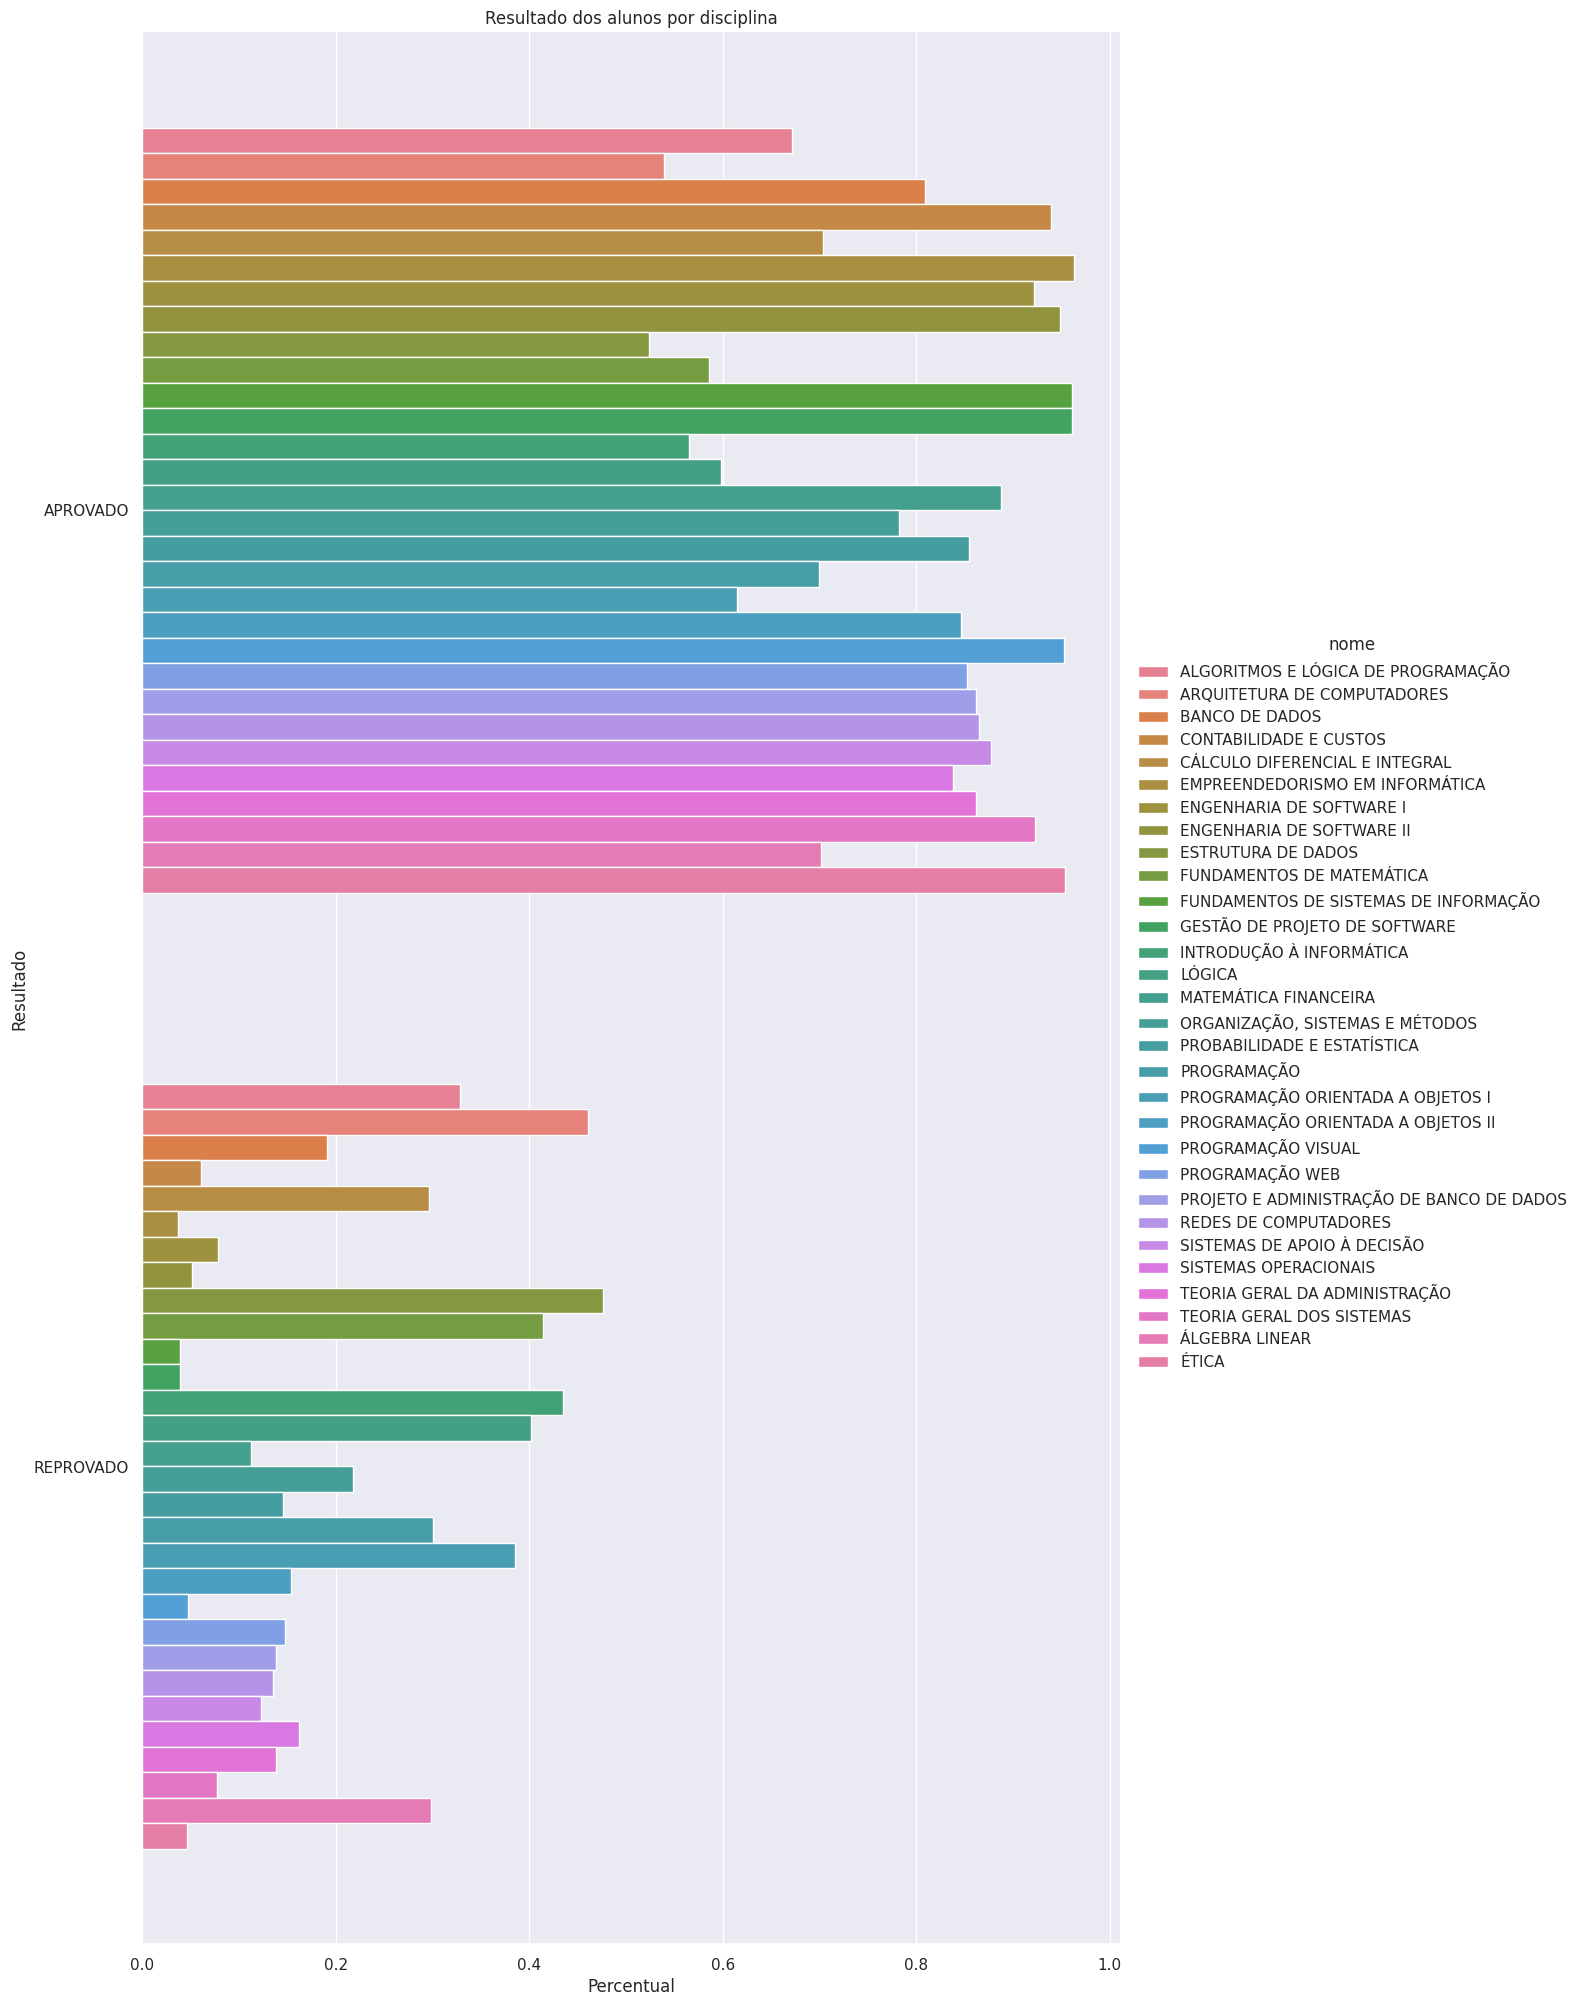

In [79]:
sns.set()
sns.catplot(x="percentual", y="descricao", hue="nome", kind="bar", data=dados_obrigatórias, legend=True, legend_out=True, height=20, aspect=0.6)
plt.xlabel("Percentual")
plt.ylabel("Resultado")
plt.title("Resultado dos alunos por disciplina")
plt.show()

In [80]:
tentativas_obrigatórias = df_dados_filtrado.groupby(["nome","discente"]).size()
tentativas_obrigatórias

nome                                discente                        
ALGORITMOS E LÓGICA DE PROGRAMAÇÃO  005c14d7c07bf7980b60c703f99c5ee7    1
                                    0107fd69d8cd7e3d30dede96fb68bfe5    2
                                    014789363f7940922e71e710ee9d22bc    2
                                    0168075add041f9eb4bba46d6fdb6387    1
                                    020d362ad9aecb1942935475f1dc5f10    1
                                                                       ..
ÉTICA                               f8fd7b4e62fd8f073b00c7f1d1a5c2ea    1
                                    fa07f8cf0fcb1601fbcc84300ebb111d    1
                                    fa7b20f8ac2312976cd7338487ad527d    1
                                    fb38dba740d0ed107efeebe85e77c84a    1
                                    fbe98ae2cc27fd7abdefa2eeced757c9    1
Length: 9911, dtype: int64

In [81]:
dados_tentativas = tentativas_obrigatórias.reset_index(name="tentativas")
dados_tentativas

,nome,discente,tentativas
0,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,005c14d7c07bf7980b60c703f99c5ee7,1
1,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,0107fd69d8cd7e3d30dede96fb68bfe5,2
2,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,014789363f7940922e71e710ee9d22bc,2
3,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,0168075add041f9eb4bba46d6fdb6387,1
4,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,020d362ad9aecb1942935475f1dc5f10,1
...,...,...,...
9906,ÉTICA,f8fd7b4e62fd8f073b00c7f1d1a5c2ea,1
9907,ÉTICA,fa07f8cf0fcb1601fbcc84300ebb111d,1
9908,ÉTICA,fa7b20f8ac2312976cd7338487ad527d,1
9909,ÉTICA,fb38dba740d0ed107efeebe85e77c84a,1


In [82]:
dados_tentativas.to_csv('teste44.csv', index=False, sep=';', quoting=csv.QUOTE_NONNUMERIC)

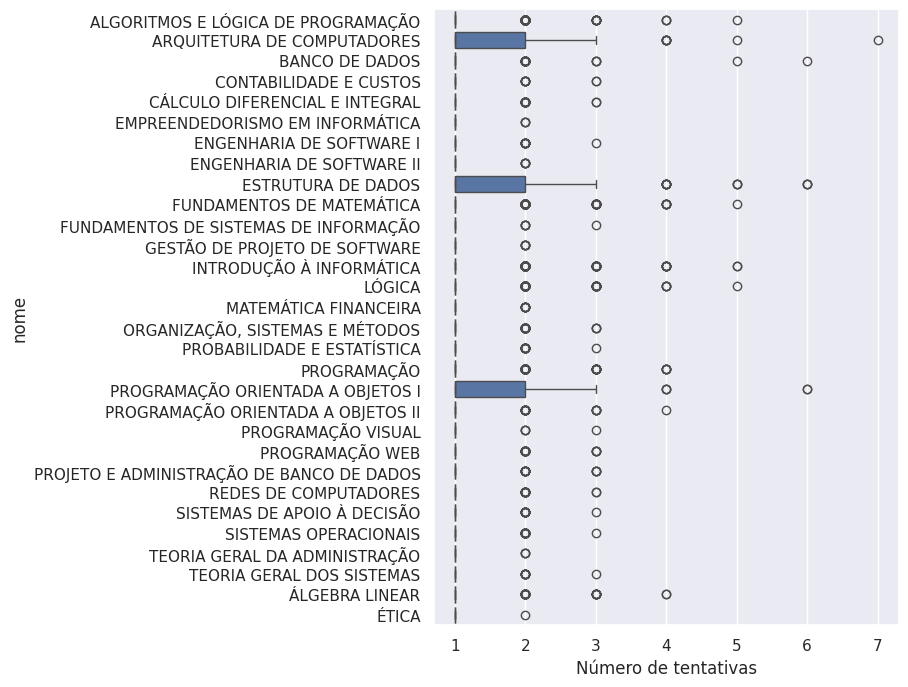

In [83]:
plt.figure(figsize=(6,8))
sns.boxplot(x="tentativas", y="nome", data=dados_tentativas)
plt.xlabel("Número de tentativas")
plt.show()

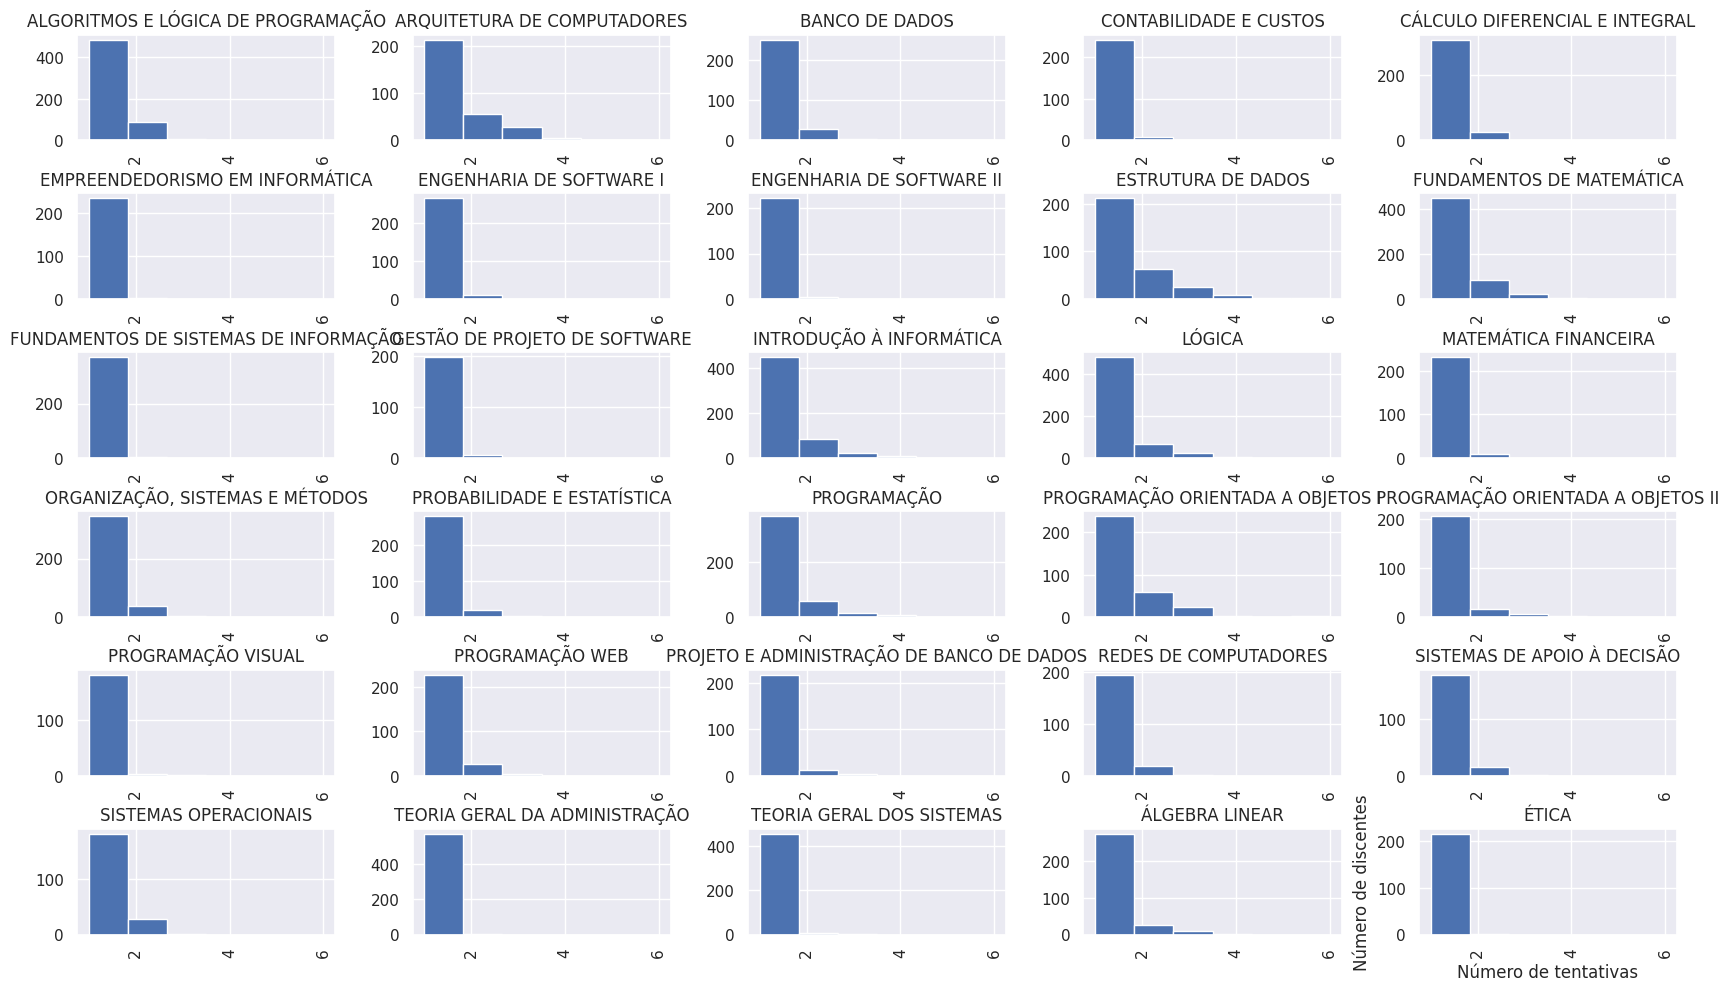

In [84]:
dados_tentativas.hist(by="nome", column="tentativas", figsize=(20,12), bins=6, range=(1,6))
plt.xlabel("Número de tentativas")
plt.ylabel("Número de discentes")
plt.show()

Agrupando os dados e deixando ordenado pela coluna discente.

In [85]:
agregado_obrigatórias = df_dados_filtrado .groupby(["discente","nome","ano","descricao"]).size()
df_dados_filtrado = df_dados_filtrado.sort_values(by='discente')
agregado_obrigatórias

discente                          nome                                ano    descricao
005c14d7c07bf7980b60c703f99c5ee7  ALGORITMOS E LÓGICA DE PROGRAMAÇÃO  20181  APROVADO     1
                                  ARQUITETURA DE COMPUTADORES         20192  REPROVADO    1
                                                                      20206  APROVADO     1
                                  BANCO DE DADOS                      20192  APROVADO     1
                                  CONTABILIDADE E CUSTOS              20202  APROVADO     1
                                                                                         ..
ff56f2c5048dae0797fd3e851572b80c  TEORIA GERAL DOS SISTEMAS           20142  APROVADO     1
                                  ÁLGEBRA LINEAR                      20172  APROVADO     1
ffe447b2fe2058d45d5f756349a26f45  ALGORITMOS E LÓGICA DE PROGRAMAÇÃO  20121  REPROVADO    1
                                  INTRODUÇÃO À INFORMÁTICA            20121  REPROVAD

In [86]:
df_dados_filtrado['media_final'] = df_dados_filtrado['media_final'].str.replace(',', '.').astype(float)

In [87]:
# Contar o número de reprovações (notas abaixo de 6.0)
reprovacoes_por_aluno = df_dados_filtrado[df_dados_filtrado['status'] == 'CANCELADO'].groupby('discente').size()
num_reprovacoes = len(reprovacoes_por_aluno)
num_reprovacoes

371